In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv,time,sys,math

import networkx as nx

In [2]:
xtrain = np.stack([[1,-1,-1,-1,-1],[-1,-1,1,-1,-1],[-1,-1,-1,-1,1]],axis=0)

In [3]:
W = np.zeros(shape=[xtrain.shape[1],xtrain.shape[1]])
N = xtrain.shape[0]

for i in range(xtrain.shape[1]):
    for j in range(i,xtrain.shape[1]):
        if i==j:
            W[i,j] = 0
            continue
        corr = 0
        for x in range(xtrain.shape[0]):
            corr += (xtrain[x,i]*xtrain[x,j])
        corr /= N
        W[i,j] = corr
        W[j,i] = corr

In [4]:
#W,a = make_random_network(5,perc_zeros=0.7)
G = nx.from_numpy_array(W)

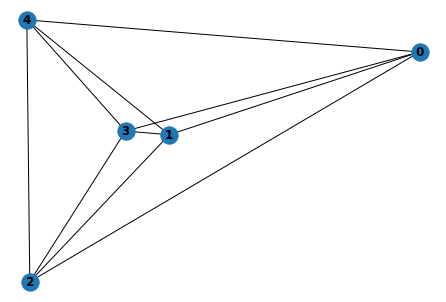

In [5]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [6]:
W

array([[ 0.        ,  0.33333333, -0.33333333,  0.33333333, -0.33333333],
       [ 0.33333333,  0.        ,  0.33333333,  1.        ,  0.33333333],
       [-0.33333333,  0.33333333,  0.        ,  0.33333333, -0.33333333],
       [ 0.33333333,  1.        ,  0.33333333,  0.        ,  0.33333333],
       [-0.33333333,  0.33333333, -0.33333333,  0.33333333,  0.        ]])

In [7]:
N = W.shape[0]

s = rnd.randn(N)
s[0] = 1
s[4] = 1

updatable = [1,2,3]
sp = s.copy()
for node in updatable:
    act = 0
    for n in range(N):
        act += W[node,n]*s[n]
    s[node] = np.tanh(act)

In [8]:
s

array([ 1.        ,  0.03918506, -0.57085844,  0.47427027,  1.        ])

In [9]:
np.tanh(5)

0.9999092042625951